# Importing required libraries

In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
from glob import glob
import cv2
import matplotlib.pylab as plt

# Importing image

In [70]:
spark_files = glob(r"/content/waam ss1.png")


# Checking if image is loaded or no

In [56]:

if len(spark_files) > 0:

    first_file = spark_files[0]
    print(f"First file found: {first_file}")
else:
    print("No matching files found.")


First file found: /content/waam ss1.png


In [57]:
if spark_files:
    # Access the first element
    first_file = spark_files[0]

else:
    print("spark_files list is empty")


In [58]:
img_mpl = plt.imread(spark_files[0])

In [59]:
(img_mpl*255).flatten()


array([  8.,  14.,   6., ...,  10.,   7., 255.], dtype=float32)

<Axes: title={'center': 'Distribution of pixels'}, ylabel='Frequency'>

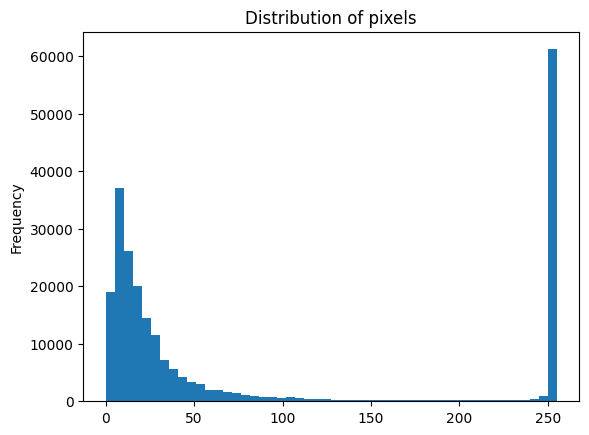

In [60]:
pd.Series((img_mpl*255).flatten()).plot(kind='hist', bins = 50, title='Distribution of pixels')

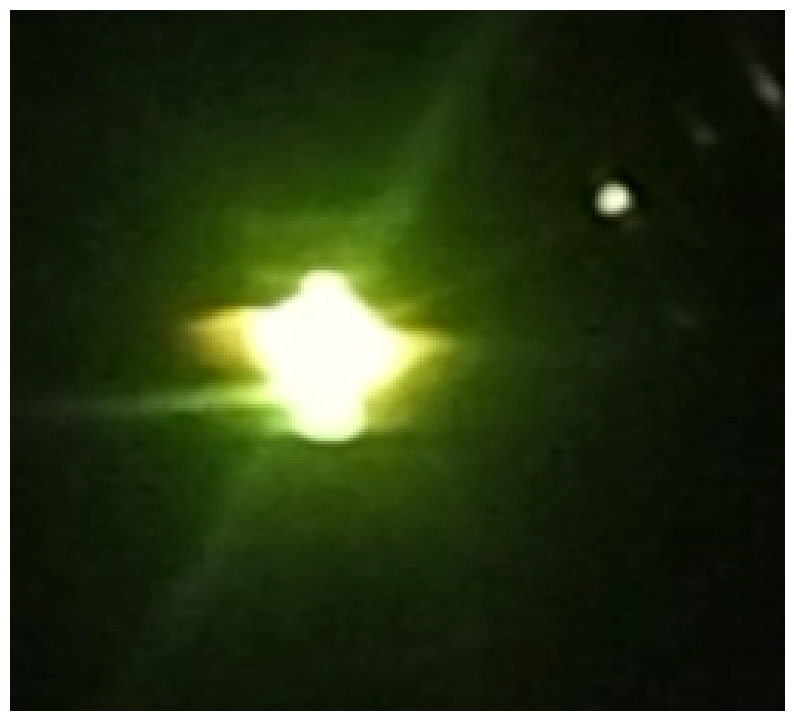

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_mpl)
ax.axis("off")
plt.show()

# Converting image into respective channels

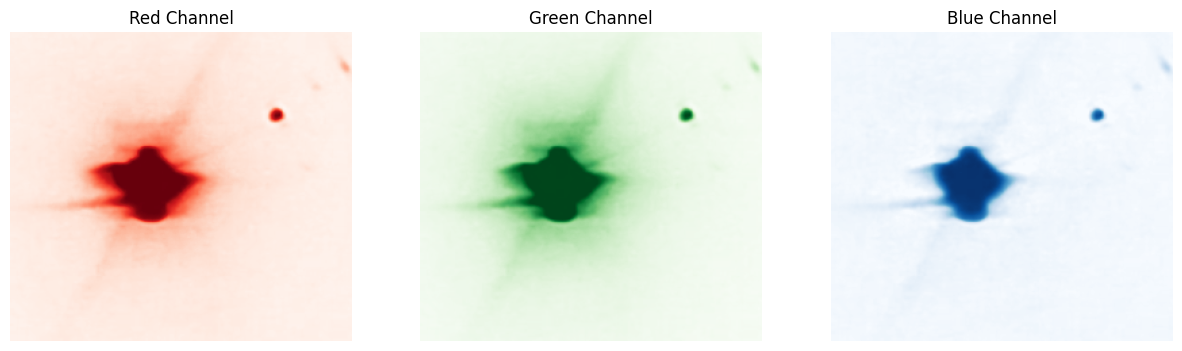

In [62]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs [2].axis('off')
axs[0].set_title('Red Channel')
axs[1].set_title('Green Channel')
axs[2].set_title('Blue Channel')
plt.show()

# Resizing the image

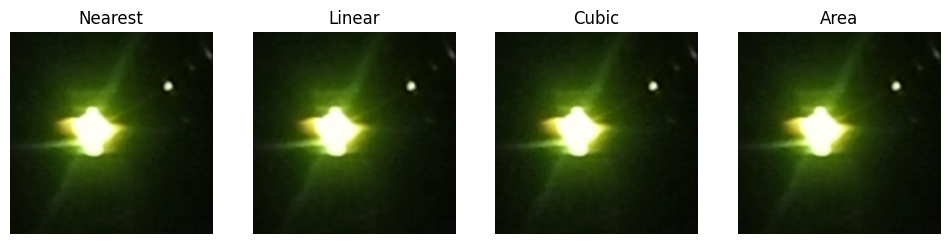

In [75]:
new_size = (1000, 1000)  # Adjust the size as needed
# Convert to RGB before resizing
image = cv2.imread('/content/waam ss1.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image_rgb, new_size, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)



methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
titles = ['Nearest', 'Linear', 'Cubic', 'Area']

plt.figure(figsize=(12, 4))

for i, method in enumerate(methods, 1):
    resized_image = cv2.resize(image_rgb, new_size, interpolation=method)
    plt.subplot(1, 4, i)
    plt.imshow(resized_image)
    plt.title(titles[i - 1])
    plt.axis('off')

plt.show()

# In image processing, **Sobel edge detection** is a widely used technique for edge detection. It uses convolution with two 3x3 kernels to calculate the estimated horizontal and vertical gradients of the image intensity. These gradients highlight the edges in the picture and show the pace at which intensity changes along the corresponding axis. Edge detection is possible in both directions because the horizontal and vertical gradients are computed independently when the image is convolved using Sobel kernels. Upon calculating the gradients, the gradient vectors' magnitude and orientation are frequently computed to ascertain the general strength and direction of the edges. Due to its simplicity and efficacy, Sobel edge detection is extensively used; yet, it may have issues with noise sensitivity and the inability to detect edges at different orientations as effectively as methods like the Scharr operator.

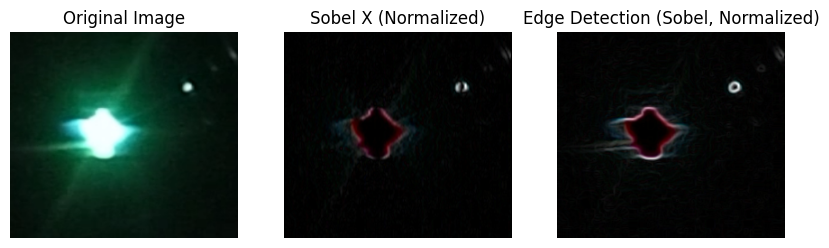

In [76]:


if image is None:
    print("Error: The image could not be loaded.")
else:
    # Apply Sobel operator for edge detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Combine the gradients and normalize the result to [0, 1]
    edges = np.sqrt(sobel_x**2 + sobel_y**2)
    edges_normalized = cv2.normalize(edges, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    # Normalize Sobel X to ensure it fits the expected range
    sobel_x_abs = np.abs(sobel_x)
    sobel_x_normalized = cv2.normalize(sobel_x_abs, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sobel_x_normalized, cmap='gray')
    plt.title('Sobel X (Normalized)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(edges_normalized, cmap='gray')
    plt.title('Edge Detection (Sobel, Normalized)')
    plt.axis('off')

    plt.show()


# **Laplacian edge detection** computes the second derivative of the picture intensity, which is a technique used in image processing to identify edges. In an image, it draws attention to abrupt variations in intensity that usually coincide with boundaries or edges between different objects or areas. By applying convolution to the image, the Laplacian operator is used, producing an image with edges that are emphasised as positive or negative peaks. Laplacian of Gaussian (LoG) operator is a combination of Laplacian operator and Gaussian smoothing that is commonly used to enhance edge detection and decrease noise sensitivity. To pinpoint the exact places of edges where the intensity changes sign, zero-crossing detection is carried out after the Laplacian operator has been applied. Laplacian edge detection can yield spurious edges in noisy images, even if technique is straightforward and efficient.

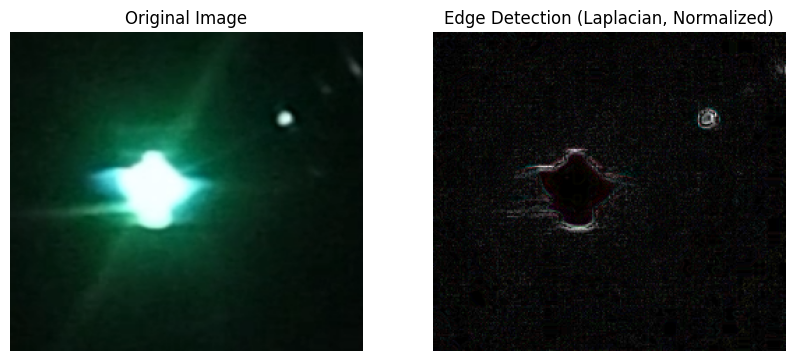

In [77]:
if image is None:
    print("Error: The image could not be loaded.")
else:
    # Apply Laplacian operator for edge detection
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Normalize the Laplacian result to the range [0, 1]
    laplacian_normalized = cv2.normalize(np.abs(laplacian), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(laplacian_normalized, cmap='gray')
    plt.title('Edge Detection (Laplacian, Normalized)')
    plt.axis('off')

    plt.show()

# Digital images can be edge detected using **Scharr and Prewitt** edge detection algorithms. In theory, they are comparable since they both use convolution with particular kernels to estimate the image's intensity gradient. Nonetheless, compared to Prewitt kernels, Scharr kernels are intended to offer superior performance, particularly for diagonal edges. Compared to Prewitt kernels, Scharr kernels exhibit superior rotation invariance and are more isotropic. This indicates that whereas Prewitt edge recognition might be more skewed towards horizontal and vertical edges, Scharr edge detection is capable of reliably detecting edges in all directions. In both methods, the image is convolved using particular kernels to compute the gradient in both horizontal and vertical directions. The gradient's magnitude and orientation are then calculated to determine the edge pixels.


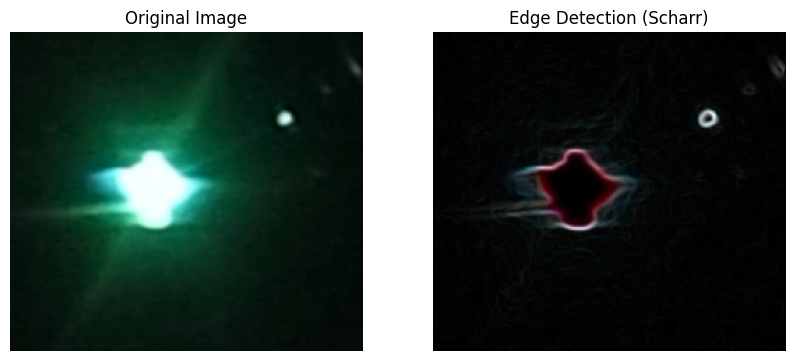

In [72]:

# Apply Scharr operator for edge detection
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)

# Combine the gradient images to get the final edge-detected image
edges_scharr = np.sqrt(scharr_x**2 + scharr_y**2)

# Normalize the result to the range [0, 1]
edges_scharr_normalized = cv2.normalize(edges_scharr, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Display the original and edge-detected images using Scharr operator
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges_scharr_normalized, cmap='gray')
plt.title('Edge Detection (Scharr)')
plt.axis('off')

plt.show()


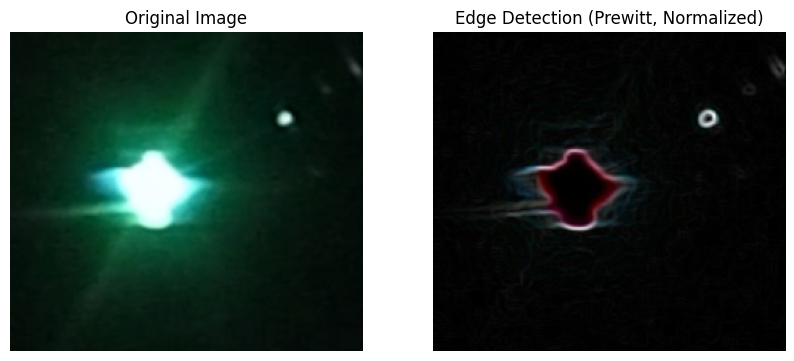

In [78]:
if image is None:
    print("Error: The image could not be loaded. Check the file path.")
else:
    # Apply Prewitt operator for edge detection
    prewitt_x = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = cv2.filter2D(image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

    # Combine the gradient images to get the final edge-detected image
    edges_prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)

    # Normalize the Prewitt result to [0, 1] to avoid clipping
    edges_prewitt_normalized = cv2.normalize(edges_prewitt, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    # Display the original and edge-detected images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges_prewitt_normalized, cmap='gray')
    plt.title('Edge Detection (Prewitt, Normalized)')
    plt.axis('off')

    plt.show()

## A common method in computer vision for accurately and efficiently identifying edges in images is called "**Canny Edge detection**." It requires multiple processes in order to accomplish reliable edge detection. To start, the image is subjected to Gaussian smoothing in order to minimise noise and remove extraneous information. Then, areas of fast intensity change—which frequently correspond to edges—are highlighted by computing gradients of the picture intensity using the Sobel operator. The edges are then thinned and only the strongest gradient magnitudes along the edges' directions are preserved via non-maximum suppression. The next step involves applying a technique called hysteresis thresholding to decide which edges to retain. In order to do this, two thresholds must be set: a high threshold for strong edges and a low threshold for weak edges. Weak edges are only kept in place if they are joined to strong edges so that the edge is traced all the way around.



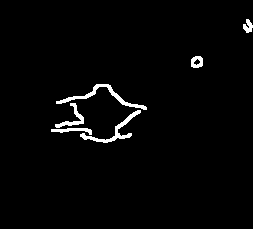

In [19]:
from google.colab.patches import cv2_imshow  # Only for Google Colab or similar notebook environments


if image is None:
    print("Error: Unable to load the image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    blurred = cv2.GaussianBlur(gray, (5, 5), 0)


    edges = cv2.Canny(blurred, 90, 150)


    dilated_edges = cv2.dilate(edges, None)


    cv2_imshow(dilated_edges)


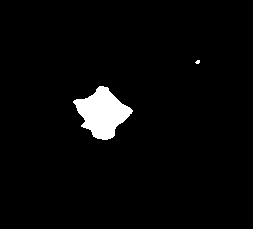

In [20]:

image = cv2.imread('/content/waam ss1.png')


if image is None:
    print("Error: Unable to load the image.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 90, 150)
    dilated_edges = cv2.dilate(edges, None)

    _, thresholded = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
    cv2_imshow(thresholded)


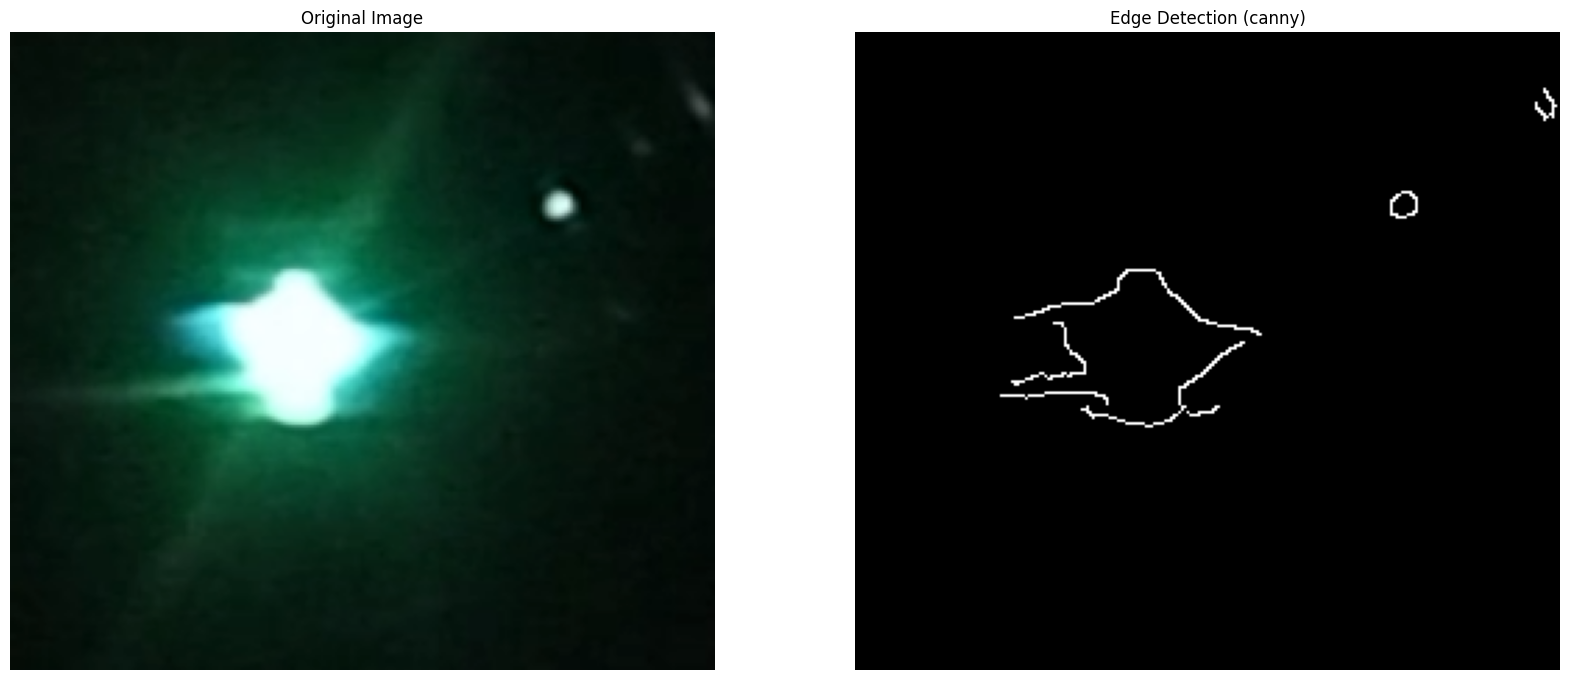

True

In [21]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(edges), cmap='gray')
plt.title('Edge Detection (canny)')
plt.axis('off')

plt.show()

# Save to current working directory to check
cv2.imwrite("output_image_test_3.png", edges)



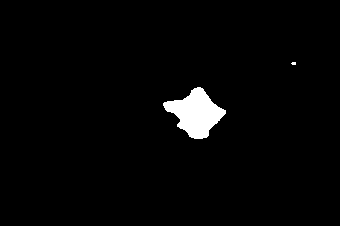

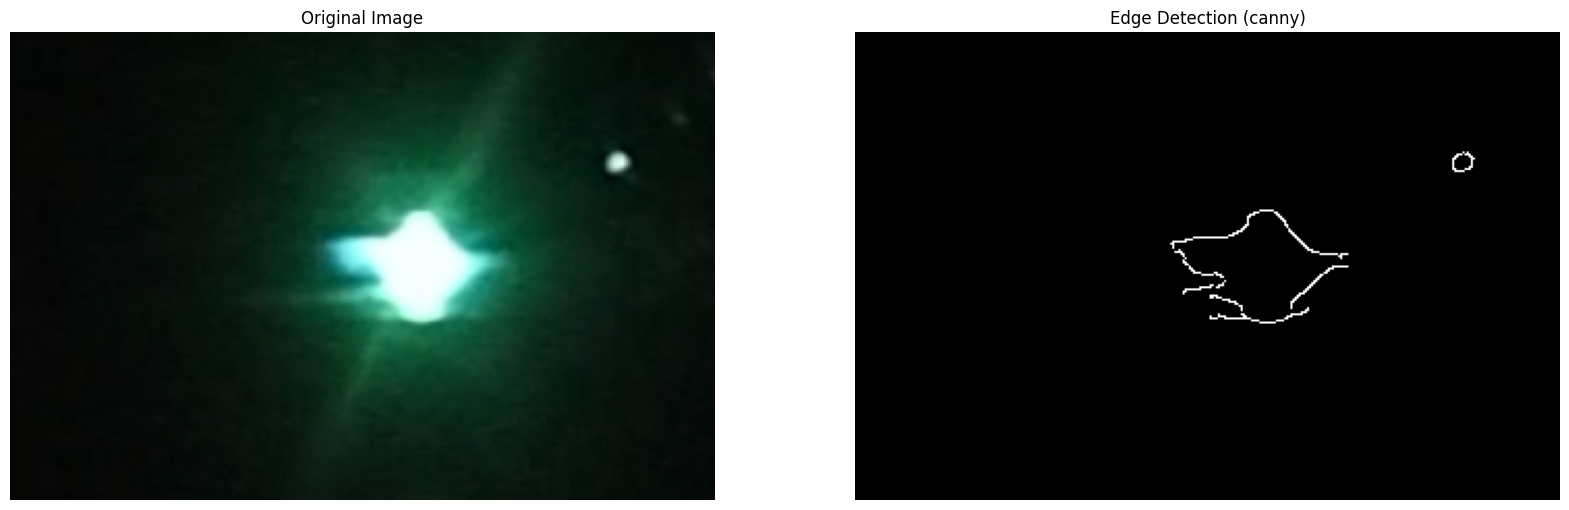

True

In [22]:
image = cv2.imread('/content/waam ss2.png')

if image is None:
    print("Error: Unable to load the image.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 90, 150)
    dilated_edges = cv2.dilate(edges, None)

    _, thresholded = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
    cv2_imshow(thresholded)
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(edges), cmap='gray')
plt.title('Edge Detection (canny)')
plt.axis('off')

plt.show()

# Save to current working directory to check
cv2.imwrite("output_image_test_2.png", edges)


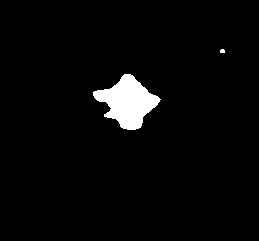

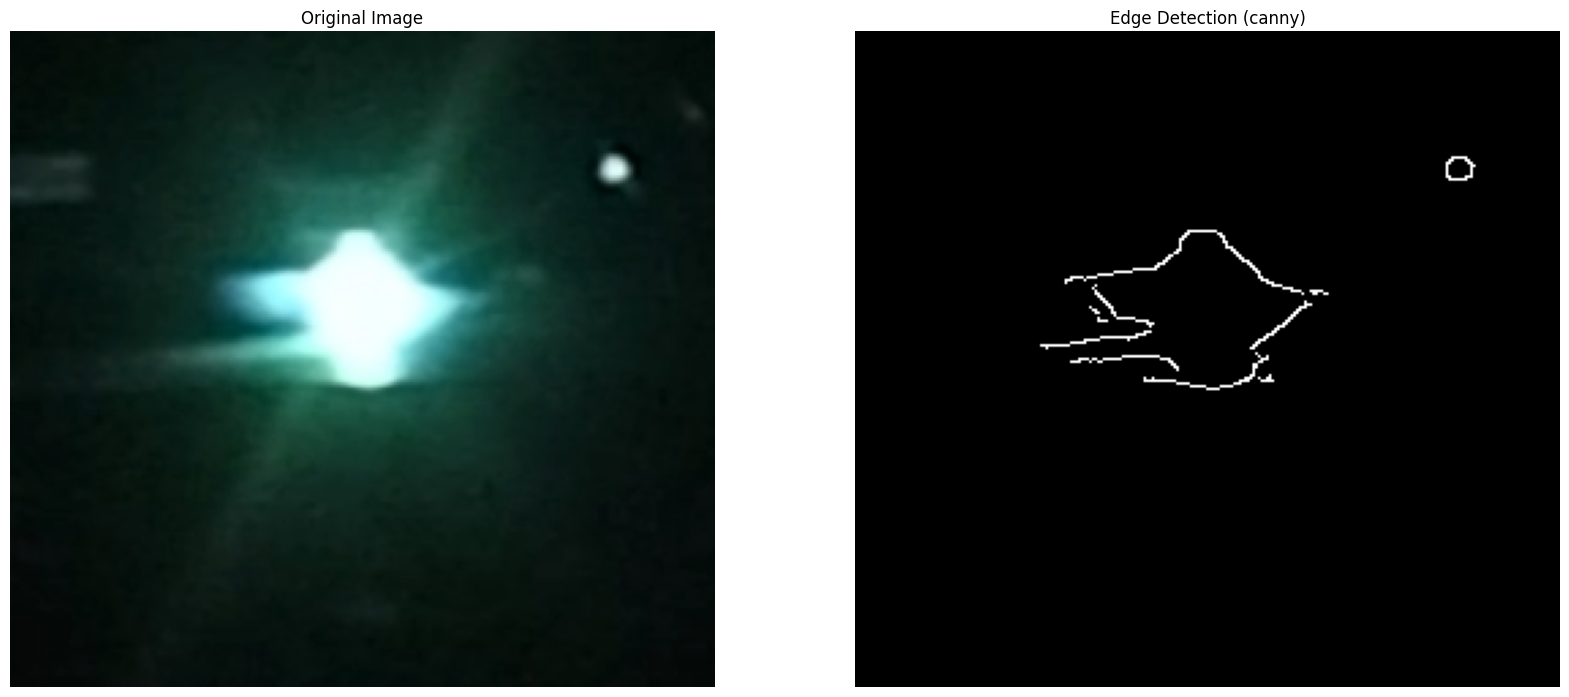

True

In [23]:

image = cv2.imread('/content/waam ss3.png')

if image is None:
    print("Error: Unable to load the image.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 90, 150)
    dilated_edges = cv2.dilate(edges, None)

    _, thresholded = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
    cv2_imshow(thresholded)
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(edges), cmap='gray')
plt.title('Edge Detection (canny)')
plt.axis('off')

plt.show()

# Save to current working directory to check
cv2.imwrite("output_image_test.png", edges)


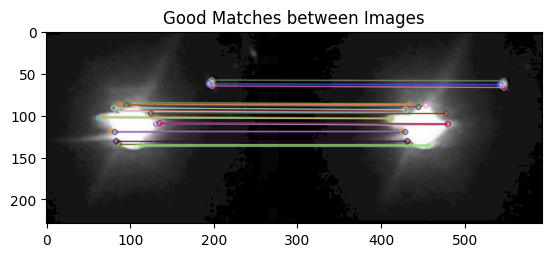

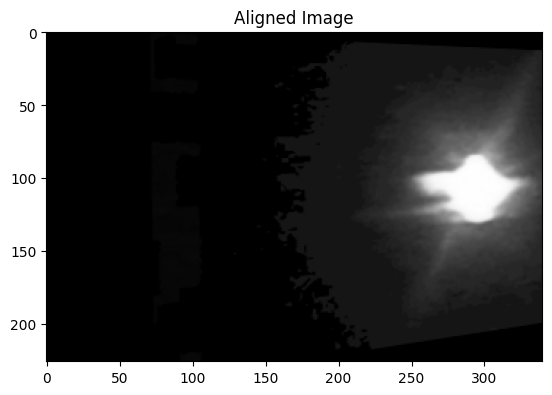

In [24]:


image1 = cv2.imread("/content/waam ss1.png", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("/content/waam ss2.png", cv2.IMREAD_GRAYSCALE)

edges1 = cv2.Canny(image1, 180, 200)
edges2 = cv2.Canny(image2, 180, 200)
orb = cv2.ORB_create(nfeatures=3000)

keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

good_matches = [m[0] for m in matches if len(m) == 2 and m[0].distance < 0.75 * m[1].distance]


good_matches = sorted(good_matches, key=lambda x: x.distance)


image_matches = cv2.drawMatches(
    image1, keypoints1, image2, keypoints2, good_matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)


H, status = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 3.0)

height, width = image2.shape


aligned_image = cv2.warpPerspective(image2, H, (width, height))
image_matches = cv2.drawMatches(
    image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)


plt.imshow(cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB))
plt.title("Good Matches between Images")
plt.show()
cv2.imwrite("output_image_matches.png", image_matches)

# Display the aligned image
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.title("Aligned Image")
plt.show()



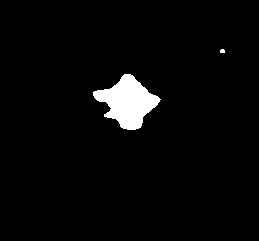

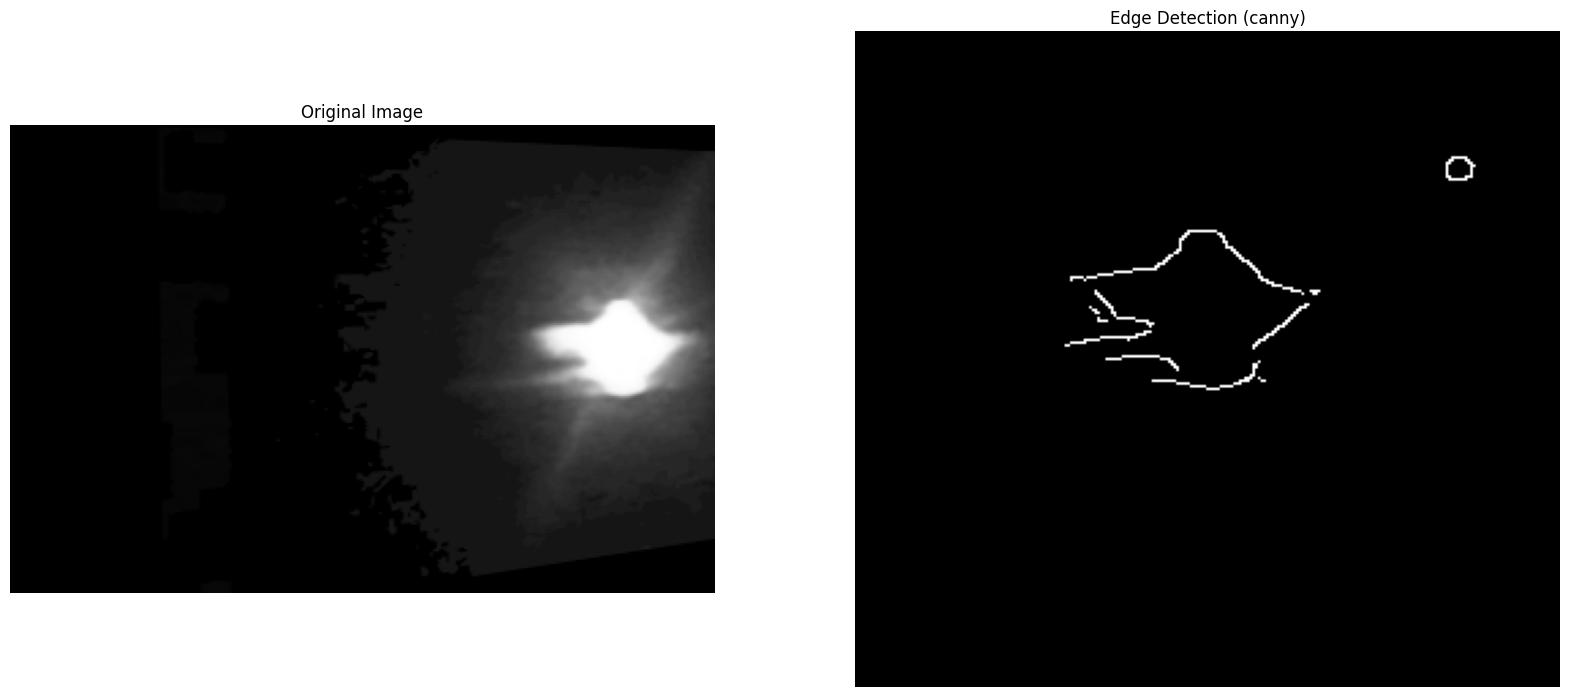

In [25]:
image = aligned_image

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load the image.")
else:
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 120, 150)
    dilated_edges = cv2.dilate(edges, None)
    _, thresholded = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
    cv2_imshow(thresholded)
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(edges), cmap='gray')
plt.title('Edge Detection (canny)')
plt.axis('off')

plt.show()


In [26]:
if edges1.shape[:2] != edges2.shape[:2]:
    new_size = (min(edges1.shape[1], edges2.shape[1]), min(edges1.shape[0], edges2.shape[0]))
    edges1 = cv2.resize(edges1, new_size)
    edges2 = cv2.resize(edges2, new_size)

In [27]:
# Compute the absolute difference between the edge-detected images
diff = cv2.absdiff(edges1, edges2)

# Threshold the difference to highlight changes
_, diff_thresholded = cv2.threshold(diff, 120, 255, cv2.THRESH_BINARY)  # Adjust threshold value as needed
# Find contours in the thresholded difference image
contours, _ = cv2.findContours(diff_thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image to visualize changes
image_with_contours = cv2.drawContours(image1.copy(), contours, -1, (0, 0, 255), 1)  # Red color for contours



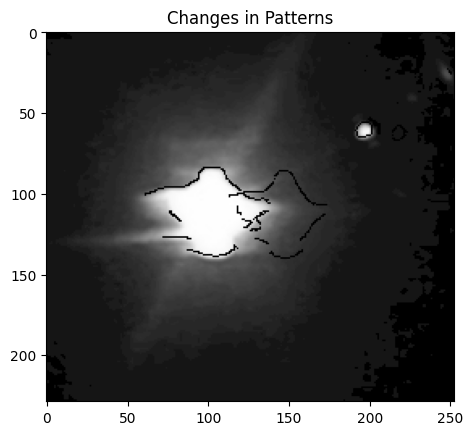

True

In [28]:
# Display the image with highlighted changes
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title("Changes in Patterns")
plt.show()
cv2.imwrite("output_image_patterns.png", image_with_contours)


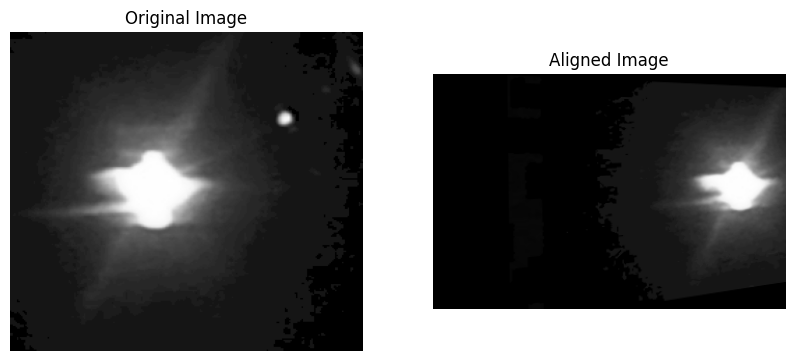

In [29]:


# Assuming 'image1' and 'aligned_image' are your original and aligned images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Aligned Image")
axes[1].axis('off')

plt.show()


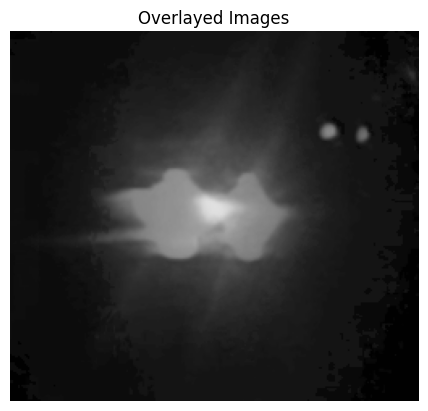

In [30]:

if image1.shape[:2] != image2.shape[:2]:

    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

blend = cv2.addWeighted(image1, 0.5, image2, 0.4, 1)

plt.imshow(cv2.cvtColor(blend, cv2.COLOR_BGR2RGB))
plt.title("Overlayed Images")
plt.axis('off')
plt.show()


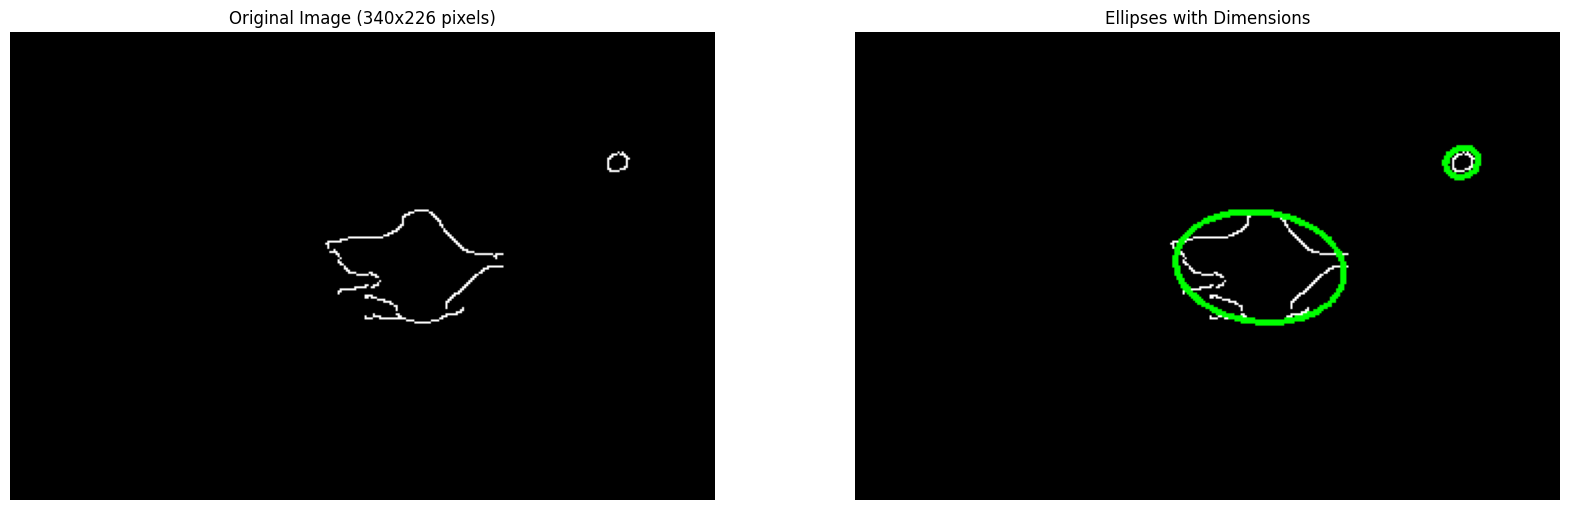

Image dimensions: 340x226 pixels
Ellipse 1:
  Center: (194.8719024658203, 113.22708129882812)
  Major Axis: 81.44
  Minor Axis: 52.79
  Orientation: 97.14 degrees
Ellipse 2:
  Center: (292.2979431152344, 62.86743927001953)
  Major Axis: 16.54
  Minor Axis: 14.00
  Orientation: 64.01 degrees


In [48]:
image = cv2.imread('/content/output_image_test_2.png')
if image is None:
    print("Error: Unable to load the image.")
else:
    height, width, channels = image.shape
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 90, 150)
    dilated_edges = cv2.dilate(edges, None)
    contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result_image = image.copy()

    # List to store ellipses' information (center, axes, orientation)
    ellipses = []
    for contour in contours:

        if len(contour) >= 5:
            # Fit an ellipse to the contour
            ellipse = cv2.fitEllipse(contour)

            # Draw the ellipse on the result image
            cv2.ellipse(result_image, ellipse, (0, 255, 0), 2)

            # Extract ellipse parameters
            (center_x, center_y), (axis_a, axis_b), angle = ellipse
            major_axis = max(axis_a, axis_b)
            minor_axis = min(axis_a, axis_b)

            # Store the ellipse information
            ellipses.append({
                "center": (center_x, center_y),
                "major_axis": major_axis,
                "minor_axis": minor_axis,
                "orientation": angle
            })


    # Display the original image and the image with ellipses and text
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image ({width}x{height} pixels)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Ellipses with Dimensions')
    plt.axis('off')
    cv2.imwrite("output_image_single_ellipse.png", result_image)

    plt.show()

    print(f"Image dimensions: {width}x{height} pixels")

    for idx, ellipses_info in enumerate(ellipses):
        print(f"Ellipse {idx + 1}:")
        print(f"  Center: {ellipses_info['center']}")
        print(f"  Major Axis: {ellipses_info['major_axis']:.2f}")
        print(f"  Minor Axis: {ellipses_info['minor_axis']:.2f}")
        print(f"  Orientation: {ellipses_info['orientation']:.2f} degrees")


In [49]:
# to store data in text file
with open("ellipse_dimensions.txt", "w") as f:
    # Write the ellipse information
    f.write("Ellipse Details:\n")
    for idx, ellipse in enumerate(ellipses):
        center = ellipse["center"]
        major_axis = ellipse["major_axis"]
        minor_axis = ellipse["minor_axis"]
        orientation = ellipse["orientation"]



        # Write the details to the text file
        f.write(f"Ellipse {idx + 1}:\n")
        f.write(f"  Center: {center}\n")
        f.write(f"  Major Axis: {major_axis:.2f}")
        f.write(f"  Minor Axis: {minor_axis:.2f} ")
        f.write(f"  Orientation: {orientation:.2f} degrees\n")
        f.write("\n")

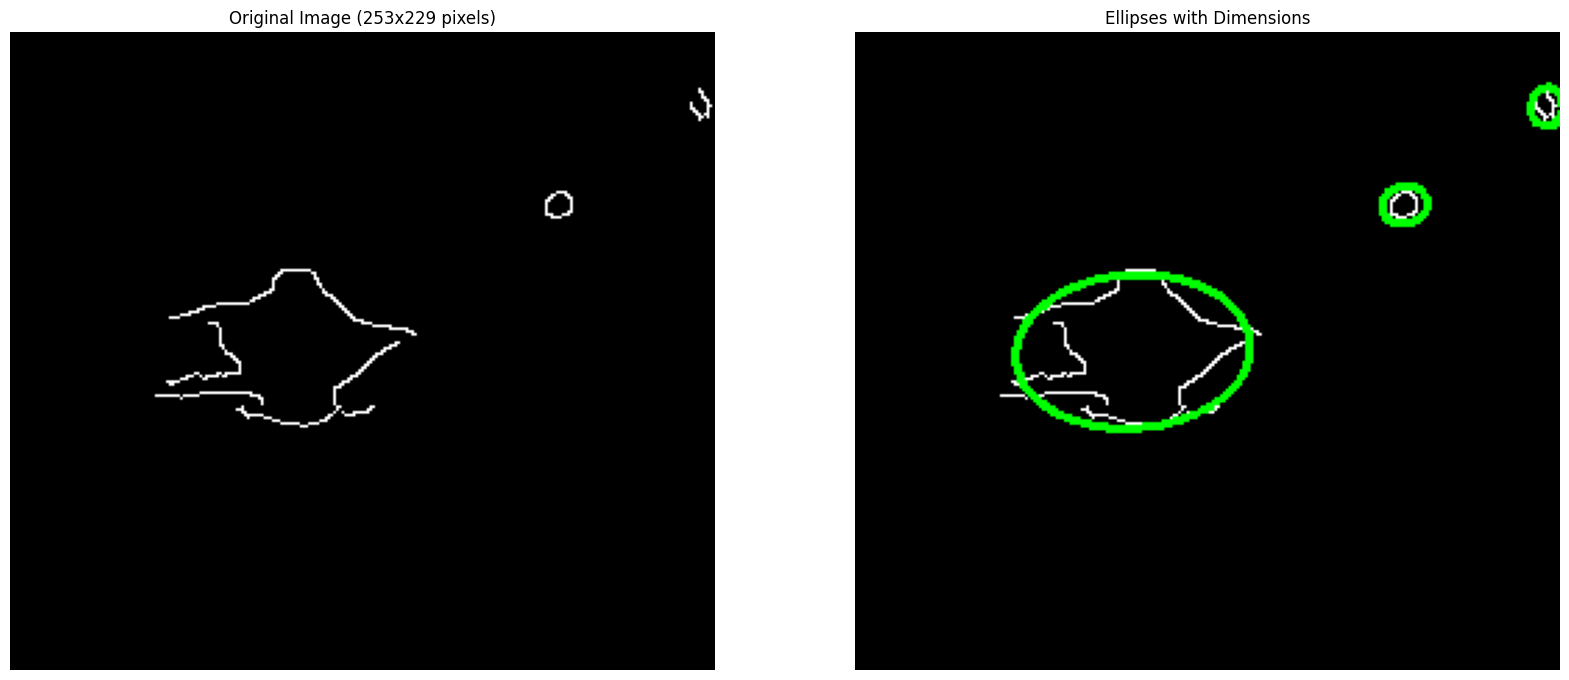

Image dimensions: 253x229 pixels
Ellipse 1:
  Center: (99.29959106445312, 114.18630981445312)
  Major Axis: 84.30
  Minor Axis: 55.14
  Orientation: 85.69 degrees
Ellipse 2:
  Center: (196.70846557617188, 61.57059097290039)
  Major Axis: 16.80
  Minor Axis: 13.87
  Orientation: 75.85 degrees
Ellipse 3:
  Center: (247.85218811035156, 26.305749893188477)
  Major Axis: 14.28
  Minor Axis: 11.45
  Orientation: 7.50 degrees


In [50]:
image = cv2.imread('/content/output_image_test_3.png')

if image is None:
    print("Error: Unable to load the image.")
else:
    height, width, channels = image.shape
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 90, 150)
    dilated_edges = cv2.dilate(edges, None)
    contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result_image = image.copy()


    ellipses = []
    for contour in contours:

        if len(contour) >= 5:

            ellipse = cv2.fitEllipse(contour)

            cv2.ellipse(result_image, ellipse, (0, 255, 0), 2)


            (center_x, center_y), (axis_a, axis_b), angle = ellipse
            major_axis = max(axis_a, axis_b)
            minor_axis = min(axis_a, axis_b)


            ellipses.append({
                "center": (center_x, center_y),
                "major_axis": major_axis,
                "minor_axis": minor_axis,
                "orientation": angle
            })



    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image ({width}x{height} pixels)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Ellipses with Dimensions')
    plt.axis('off')

    plt.show()

    print(f"Image dimensions: {width}x{height} pixels")

    for idx, ellipses_info in enumerate(ellipses):
        print(f"Ellipse {idx + 1}:")
        print(f"  Center: {ellipses_info['center']}")
        print(f"  Major Axis: {ellipses_info['major_axis']:.2f}")
        print(f"  Minor Axis: {ellipses_info['minor_axis']:.2f}")
        print(f"  Orientation: {ellipses_info['orientation']:.2f} degrees")



with open("ellipse_dimensions.txt", "a") as f:
        f.write("\n")
        f.write(f"Content from: output_image_test_3:\n")
        f.write("\n")
        for idx, ellipse in enumerate(ellipses):
            f.write(f"Ellipse {idx + 1}:\n")
            f.write(f"  Center: {ellipse['center']}\n")
            f.write(f"  Major Axis: {ellipse['major_axis']:.2f} pixels\n")
            f.write(f"  Minor Axis: {ellipse['minor_axis']:.2f} pixels\n")
            f.write(f"  Orientation: {ellipse['orientation']:.2f} degrees\n")
            f.write("\n")


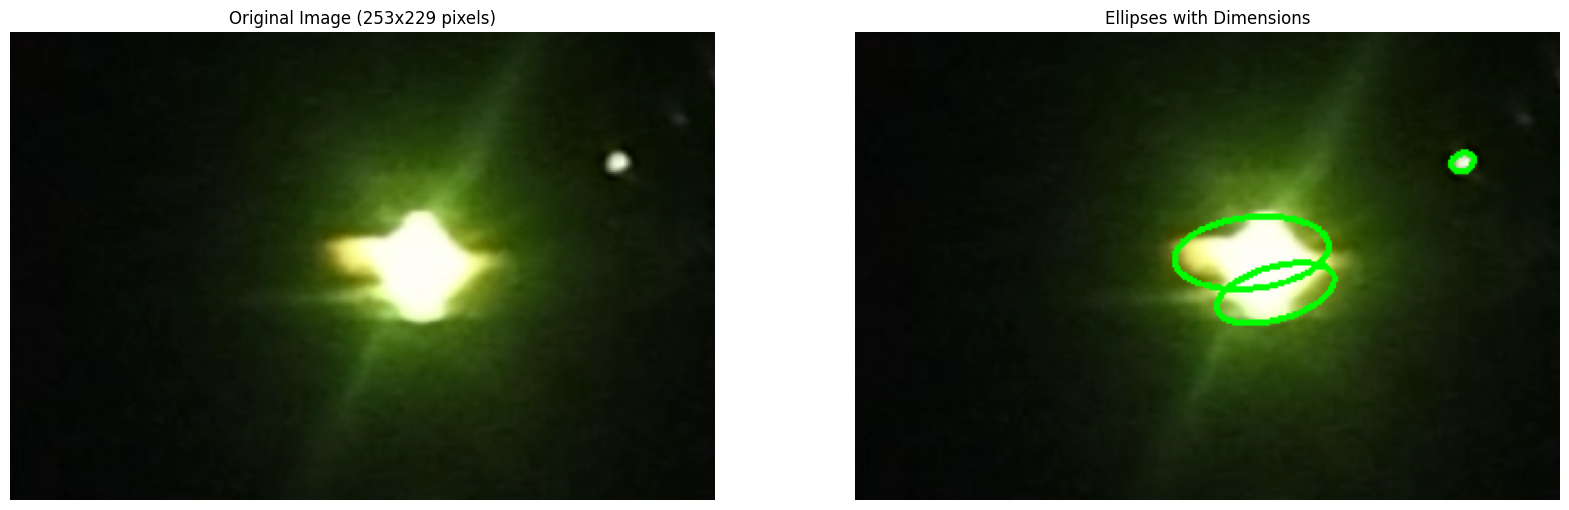

Image dimensions: 253x229 pixels
Ellipse 1:
  Center: (202.40402221679688, 125.83978271484375)
  Major Axis: 58.47
  Minor Axis: 25.36
  Orientation: 74.50 degrees
Ellipse 2:
  Center: (190.76400756835938, 106.391357421875)
  Major Axis: 74.50
  Minor Axis: 34.33
  Orientation: 83.84 degrees
Ellipse 3:
  Center: (292.4830322265625, 62.72209548950195)
  Major Axis: 11.39
  Minor Axis: 8.67
  Orientation: 64.88 degrees


In [51]:
# to get two ellipses
image = cv2.imread('/content/waam ss2.png')
if image is None:
    print("Error: Unable to load the image.")
else:

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 90, 150)

    kernel = np.ones((3, 3), np.uint8)
    edges_morphed = cv2.dilate(edges, kernel, iterations=1)
    edges_morphed = cv2.erode(edges_morphed, kernel, iterations=1)
    contours, _ = cv2.findContours(edges_morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    result_image = image.copy()

    for contour in contours:

        if len(contour) >= 5:

            ellipse = cv2.fitEllipse(contour)
            cv2.ellipse(result_image, ellipse, (0, 255, 0), 2)
    ellipses = []
    for contour in contours:

        if len(contour) >= 5:

            ellipse = cv2.fitEllipse(contour)

            cv2.ellipse(result_image, ellipse, (0, 255, 0), 2)


            (center_x, center_y), (axis_a, axis_b), angle = ellipse
            major_axis = max(axis_a, axis_b)
            minor_axis = min(axis_a, axis_b)


            ellipses.append({
                "center": (center_x, center_y),
                "major_axis": major_axis,
                "minor_axis": minor_axis,
                "orientation": angle
            })
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image ({width}x{height} pixels)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Ellipses with Dimensions')
    plt.axis('off')

    plt.show()
    cv2.imwrite("output_image_single_two_ellipse.png", result_image)
    print(f"Image dimensions: {width}x{height} pixels")

    for idx, ellipses_info in enumerate(ellipses):
        print(f"Ellipse {idx + 1}:")
        print(f"  Center: {ellipses_info['center']}")
        print(f"  Major Axis: {ellipses_info['major_axis']:.2f}")
        print(f"  Minor Axis: {ellipses_info['minor_axis']:.2f}")
        print(f"  Orientation: {ellipses_info['orientation']:.2f} degrees")

    with open("ellipse_dimensions.txt", "a") as f:
            f.write("\n")
            f.write(f"Content from: output_image_test_2 with two ellipses:\n")
            f.write("\n")
            for idx, ellipse in enumerate(ellipses):
                f.write(f"Ellipse {idx + 1}:\n")
                f.write(f"  Center: {ellipse['center']}\n")
                f.write(f"  Major Axis: {ellipse['major_axis']:.2f} pixels\n")
                f.write(f"  Minor Axis: {ellipse['minor_axis']:.2f} pixels\n")
                f.write(f"  Orientation: {ellipse['orientation']:.2f} degrees\n")
                f.write("\n")

In [47]:
# to delete the text file
import os


# Specify the file path
file_path = "ellipse_dimensions.txt"

# Check if the file exists before attempting to delete it
if os.path.exists(file_path):
    # Delete the file
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")


ellipse_dimensions.txt has been deleted.
